In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\geono\Downloads\Telco\WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Cleaning**

In [4]:
df.drop('customerID',inplace=True,axis=1)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df['gender']=pd.get_dummies(df['gender'],dtype=int,drop_first=True)

#0 is Female
#1 is Male

In [8]:
df[['Partner','Dependents']]=pd.get_dummies(df[['Partner','Dependents']]\
               ,dtype=int,drop_first=True)

#Partner=1 :yes
#Partner=0 :no
#Dependents=1 :yes
#Dependents=0 :no

In [9]:
for column in df:
    print(column)
    print(df[column].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' 

In [10]:
df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=\
    df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace({'No internet service':'No'})

In [11]:
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})

In [12]:
df[['PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No']]=\
        pd.get_dummies(df[['PaymentMethod','Contract','InternetService']],dtype=int)

In [13]:
df.drop(['PaymentMethod','Contract','InternetService'],axis=1,inplace=True)

In [14]:
df[['Churn','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport',\
    'DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines','PhoneService']]\
                     =df[['Churn','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport',\
                            'DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines','PhoneService']].replace({'Yes':1,'No':0})

C:\Users\geono\AppData\Local\Temp\ipykernel_18396\1215486281.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines','PhoneService']].replace({'Yes':1,'No':0})


In [15]:
for column in df:
    print(column)
    print(df[column].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
[0 1]
PaymentMethod_Bank transfer (automatic)
[0 1]
PaymentMethod_Credit card (automatic)
[0 1]
PaymentMethod_Electronic check
[1 0]
PaymentMethod_Mailed check
[0 1]
Contract_Month-to-month
[1 0]
Contract_One year
[0 1]
Contract_Two year
[0 1]
InternetService_DSL
[1 0]
InternetService_Fiber optic
[0 1]
InternetService_No
[0 1]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [17]:
df[df['TotalCharges']==' ']['TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [18]:
df[df['TotalCharges']==' ']['MonthlyCharges']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [19]:
df.loc[df['TotalCharges']==' ', 'TotalCharges'] = (df['MonthlyCharges']*12).astype(str)

In [20]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [21]:
for column in df:
    print(column)
    print(df[column].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]
PaymentMethod_Bank transfer (automatic)
[0 1]
PaymentMethod_Credit card (automatic)
[0 1]
PaymentMethod_Electronic check
[1 0]
PaymentMethod_Mailed check
[0 1]
Contract_Month-to-month
[1 0]
Contract_One year
[0 1]
Contract_Two year
[0 1]
InternetService_DSL
[1 0]
InternetService_Fiber optic
[0 1]
InternetService_No
[0 1]


***EDA***

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Customer Partner Distribution By Churn Status')

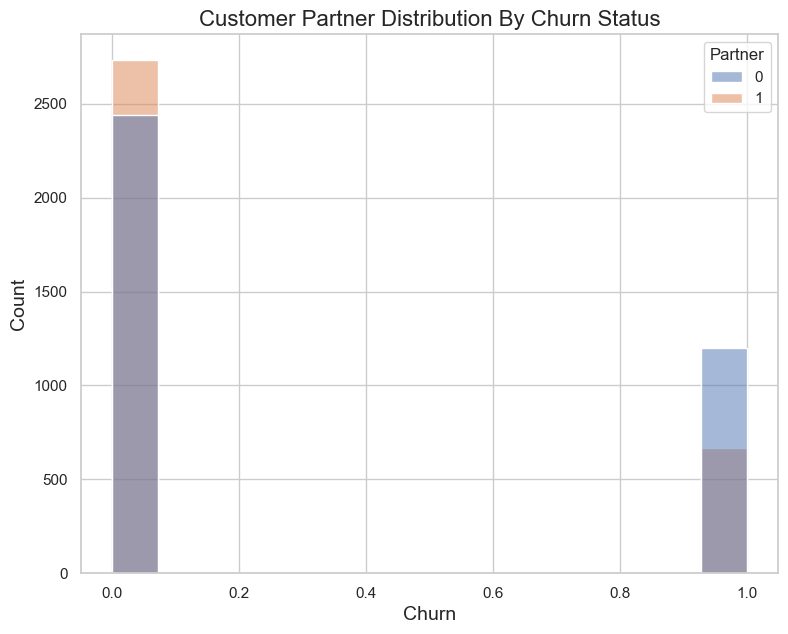

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,7))
sns.histplot(x='Churn',data=df,hue='Partner')
plt.xlabel('Churn',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Customer Partner Distribution By Churn Status', fontsize=16)

Text(0.5, 1.0, 'Customer Tenure Distribution By Churn Status')

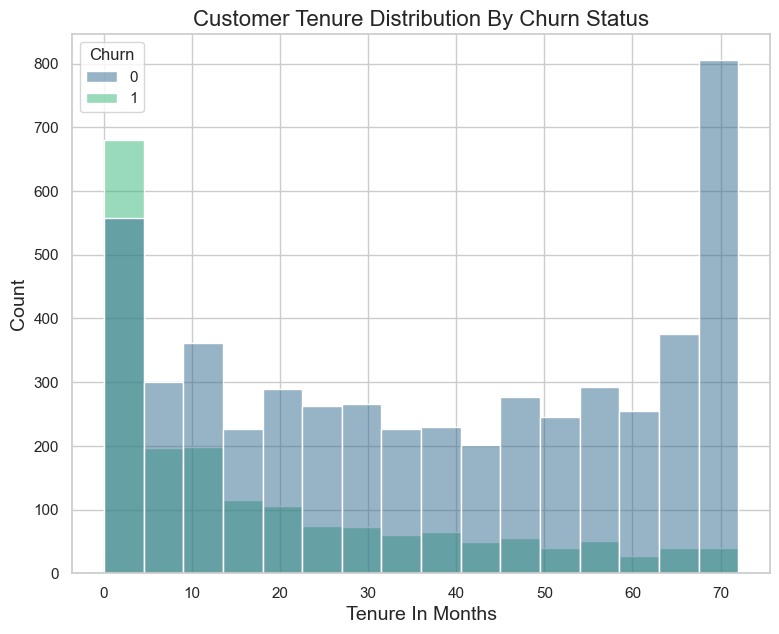

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,7))
sns.histplot(x='tenure',hue='Churn',data=df,palette='viridis')
plt.xlabel('Tenure In Months',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Customer Tenure Distribution By Churn Status', fontsize=16)


Text(0, 0.5, 'Count')

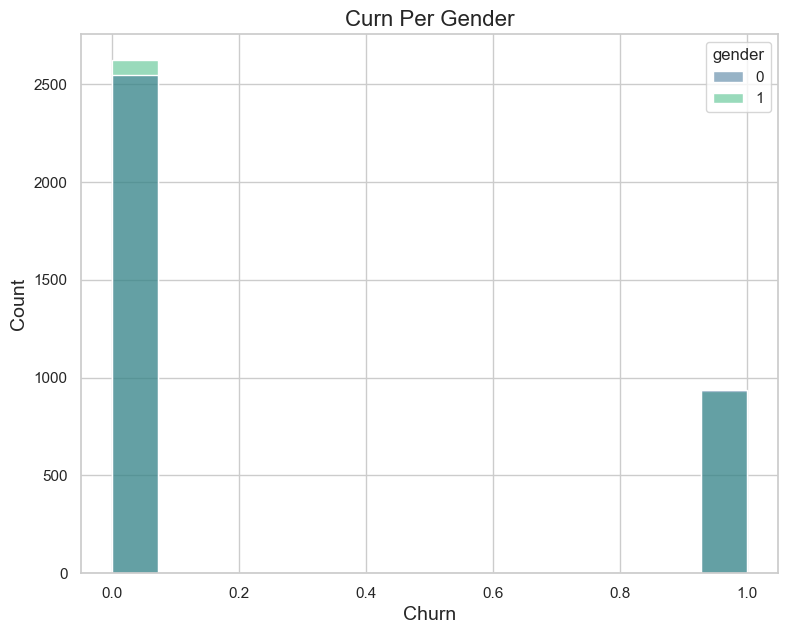

In [25]:
plt.figure(figsize=(9,7))
sns.histplot(x='Churn',hue='gender',data=df,palette='viridis')
#Gender 0=Female,1=Male
plt.title('Curn Per Gender',fontsize=16)
plt.xlabel('Churn',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0.5, 1.0, 'Customer Monthly Charges Distribution By Churn Status')

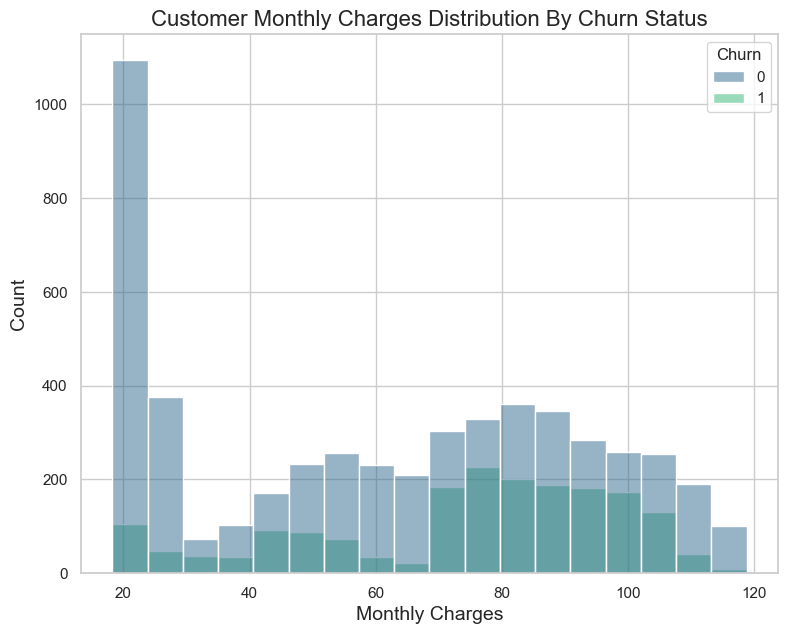

In [26]:
plt.figure(figsize=(9,7))
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,palette='viridis')
plt.xlabel('Monthly Charges',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Customer Monthly Charges Distribution By Churn Status', fontsize=16)


Text(0.5, 1.0, 'Customer Total Charges Distribution By Churn Status')

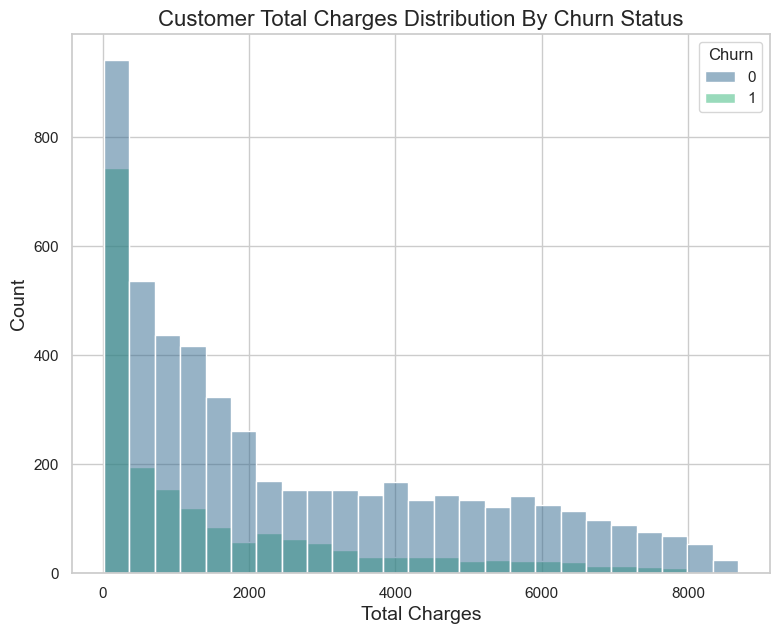

In [27]:
plt.figure(figsize=(9,7))
sns.histplot(x='TotalCharges',hue='Churn',data=df,palette='viridis')
plt.xlabel('Total Charges',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Customer Total Charges Distribution By Churn Status', fontsize=16)

C:\Users\geono\AppData\Local\Temp\ipykernel_18396\1474993095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values,y=corr.index,palette='viridis')


Text(0.5, 1.0, 'Top 12 Columns Correlated To Churn ')

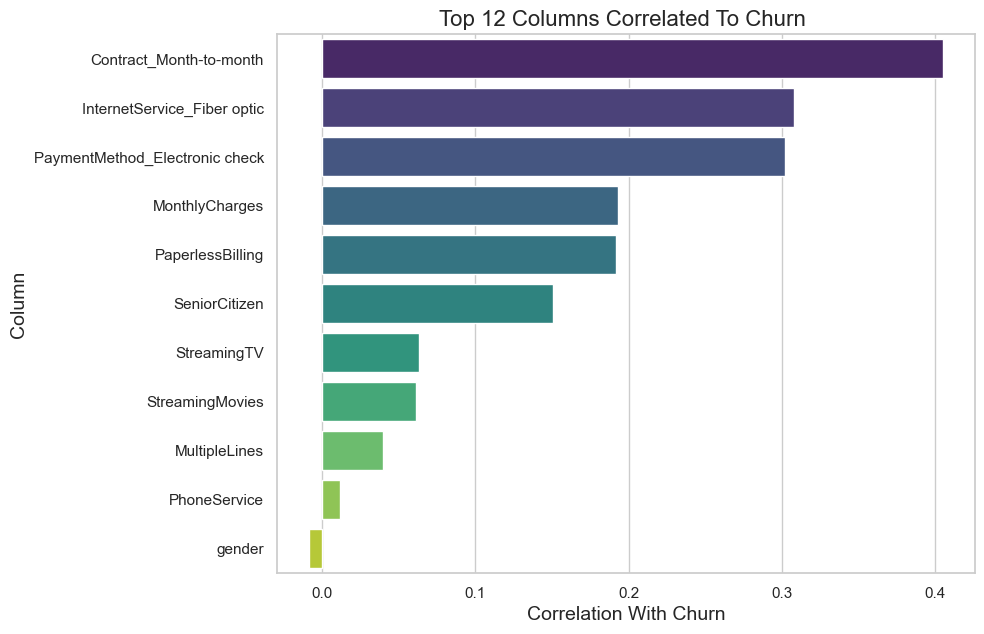

In [28]:
corr=df.corr()['Churn'].sort_values(ascending=False).head(12)[1:]
plt.figure(figsize=(9,7))
sns.barplot(x=corr.values,y=corr.index,palette='viridis')
plt.xticks(rotation=0)
plt.ylabel('Column',fontsize=14)
plt.xlabel('Correlation With Churn',fontsize=14)
plt.title('Top 12 Columns Correlated To Churn ',fontsize=16)

In [29]:
corr.index

Index(['Contract_Month-to-month', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'MonthlyCharges', 'PaperlessBilling',
       'SeniorCitizen', 'StreamingTV', 'StreamingMovies', 'MultipleLines',
       'PhoneService', 'gender'],
      dtype='object')

Text(0.5, 1.0, 'Relationship Tenure-Monthly Charges-Churn')

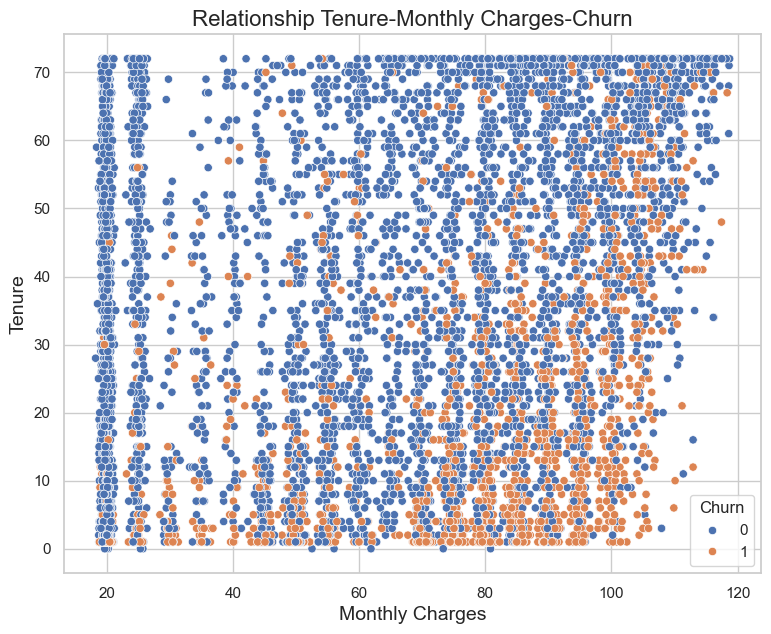

In [30]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='MonthlyCharges',y='tenure',data=df,hue='Churn')
plt.ylabel('Tenure',fontsize=14)
plt.xlabel('Monthly Charges',fontsize=14)
plt.title('Relationship Tenure-Monthly Charges-Churn',fontsize=16)

Text(0.5, 1.0, 'Relationship Tenure-Total Charges-Churn')

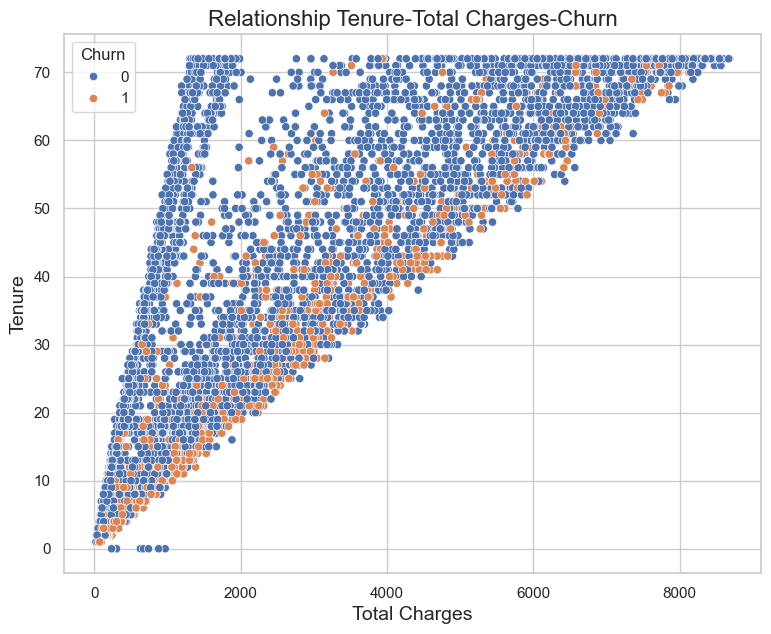

In [31]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='TotalCharges',y='tenure',data=df,hue='Churn')
plt.ylabel('Tenure',fontsize=14)
plt.xlabel('Total Charges',fontsize=14)
plt.title('Relationship Tenure-Total Charges-Churn',fontsize=16)

**Let's Create Our ANN Model**

*Train Test Split*

In [136]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

*Scaling The Data*

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaler=MinMaxScaler()

In [195]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

*Creating The Model*

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation


In [210]:
X_train.shape

(5282, 26)

In [211]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [212]:
model=Sequential()
model.add(Dense(units=26,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=26,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=26,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

*Training The Model*

In [213]:
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),verbose=2,callbacks=[early_stop])

Epoch 1/200
166/166 - 3s - 17ms/step - accuracy: 0.6357 - loss: 0.6389 - val_accuracy: 0.7263 - val_loss: 0.5010
Epoch 2/200
166/166 - 0s - 3ms/step - accuracy: 0.7380 - loss: 0.5266 - val_accuracy: 0.7581 - val_loss: 0.4605
Epoch 3/200
166/166 - 0s - 2ms/step - accuracy: 0.7429 - loss: 0.5005 - val_accuracy: 0.7655 - val_loss: 0.4444
Epoch 4/200
166/166 - 0s - 2ms/step - accuracy: 0.7558 - loss: 0.4827 - val_accuracy: 0.7746 - val_loss: 0.4416
Epoch 5/200
166/166 - 0s - 2ms/step - accuracy: 0.7639 - loss: 0.4774 - val_accuracy: 0.7723 - val_loss: 0.4420
Epoch 6/200
166/166 - 0s - 2ms/step - accuracy: 0.7639 - loss: 0.4686 - val_accuracy: 0.7848 - val_loss: 0.4407
Epoch 7/200
166/166 - 0s - 2ms/step - accuracy: 0.7745 - loss: 0.4666 - val_accuracy: 0.7899 - val_loss: 0.4354
Epoch 8/200
166/166 - 0s - 2ms/step - accuracy: 0.7749 - loss: 0.4664 - val_accuracy: 0.7922 - val_loss: 0.4352
Epoch 9/200
166/166 - 0s - 2ms/step - accuracy: 0.7770 - loss: 0.4583 - val_accuracy: 0.7950 - val_loss

In [214]:
model_loss=pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Learning Curves')

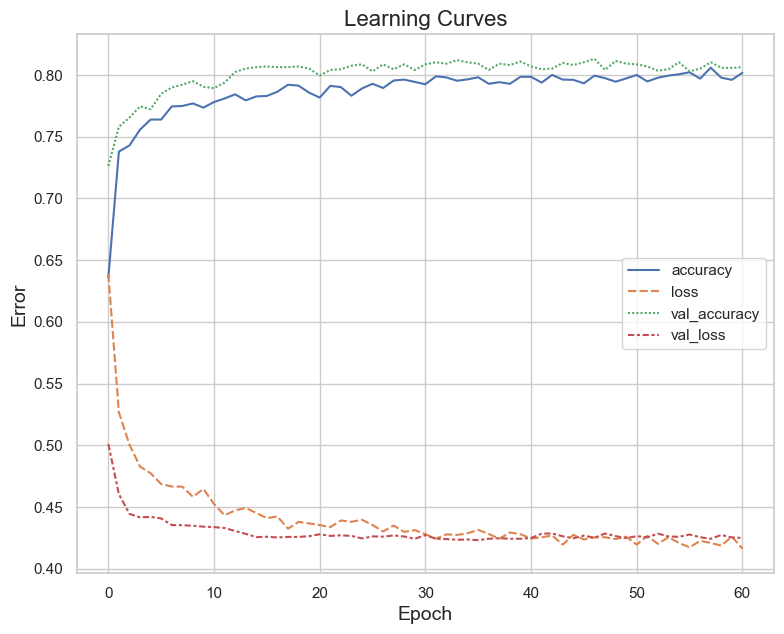

In [215]:
plt.figure(figsize=(9,7))
sns.lineplot(model_loss)
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('Error',fontsize=14)
plt.title('Learning Curves',fontsize=16)


*Model Evaluation*

In [216]:
predictions = (model.predict(X_test)>0.5).astype('int32')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [217]:
model.evaluate(X_test,y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7800 - loss: 0.4551


[0.4249142110347748, 0.8063600063323975]

In [218]:
from sklearn.metrics import confusion_matrix,classification_report

In [219]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1279
           1       0.69      0.53      0.60       482

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [220]:
print(confusion_matrix(y_test,predictions))

[[1166  113]
 [ 228  254]]


Text(0.5, 1.0, 'Confusion Matrix')

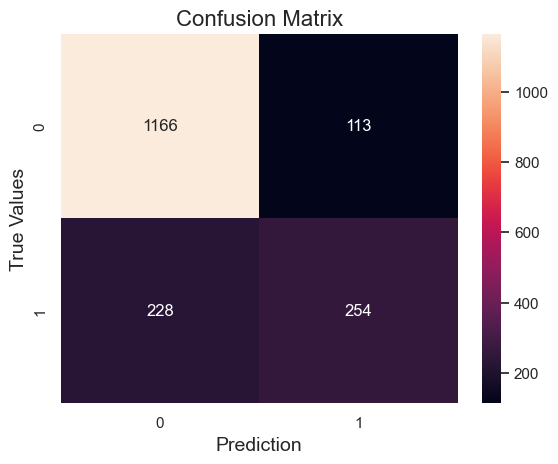

In [221]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')
plt.xlabel('Prediction',fontsize=14)
plt.ylabel('True Values',fontsize=14)
plt.title('Confusion Matrix',fontsize=16)